## Importing necessary libraries

In [36]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

## Reading the Ugly Duckling story from this <a href="https://gutenberg.ca/ebooks/andersen-ugly/andersen-ugly-00-h.html">link</a> by using BeautifulSoup
* 200 tells us the request was successful
* Note:
> 2xx: Successful<br>
>3xx: Redirection<br>
>4xx: Client Error<br>
>5xx: Server Error

In [37]:
url = "https://gutenberg.ca/ebooks/andersen-ugly/andersen-ugly-00-h.html"

resp = requests.get(url)
resp

<Response [200]>

## Parsing the html and prettifying the format
* Limited to 2000 characters as the texts are too long

In [38]:
duckling_soup = BeautifulSoup(resp.text, "html.parser")
print(duckling_soup.prettify()[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <title>
   The Ugly Duckling,
      by Hans Christian Andersen
  </title>
  <style type="text/css">
   /*<![CDATA[  XML blockout */
<!--

    p {margin-top: .75em; text-align: justify; margin-bottom: .75em; }

    p.main {font-style: normal; font-size: 100%; text-indent: 0em;}

    h1,h2,h3,h4,h5,h6 {text-align: center; clear: both;}
    hr {width: 33%; margin-top: 2em; margin-bottom: 2em; margin-left: auto;
         margin-right: auto; clear: both;}

    body{margin-left: 10%;
         margin-right: 10%;
         font-family: serif}

    .smcap    {font-variant: small-caps; font-size: 95%;}

    .pagenum  {position: absolute; left: 2em; font-size: 70%;
               text-align: right;}

    table {margin-left: auto; margin-right: auto;}



## Finding instances of a Tag

In [39]:
duckling_soup.find_all("p")[6].get_text()

'At last, one egg after another cracked, and said: "Pip! pip!" All the\negg-yolks had come to life and were sticking their heads out.'

## Extracting only the texts in between paragraphs
* Print only the first 2000 characters as the string is too long


In [40]:
txt = ""
result = ""

for txt in duckling_soup.find_all("p"): 
    result += txt.get_text()

print(result[:2000])


* A Project Gutenberg Canada Ebook *

This ebook is made available at no cost and with very few
restrictions. These restrictions apply only if (1) you make
a change in the ebook (other than alteration for different
display devices), or (2) you are making commercial use of
the ebook. If either of these conditions applies, please
check 
gutenberg.ca/links/licence.html before proceeding.

This work is in the Canadian public domain, but may be under
copyright in some countries. If you live outside Canada, check your
country's copyright laws. If the book is under copyright
in your country, do not download or redistribute this file.

The Ugly Duckling was written by Hans Christian Andersen
(1805-1875), and was translated from the Danish by
M. R. James (1862-1936) as part of his
Hans Andersen Forty-Two Stories (1930).

This ebook was produced by: David T. Jones, Mark Akrigg
& the Online Distributed Proofreading Team
at http://www.pgdpcanada.net
It was very pleasant out in the country. It was

## Removing unnecessary data
* Notice that the introduction, footnote and "[1]" in the middle of the text being imported as well

In [41]:
head, sep, tail = result.partition("\n[1]\nThis needs")
head, sep, tail = head.partition("http://www.pgdpcanada.net")
tail = tail.replace("[1]", "")

## Displaying the whole story

In [42]:
print(tail)


It was very pleasant out in the country. It was summer time, the corn
was yellow, the oats green, the hay was stacked down in the green
meadows, and there the stork walked about on his long red legs and
talked Egyptian. He had learnt the language from his mother. Round the
fields and meadows there were large woods and within them deep lakes:
indeed, it was pleasant out in the country. Full in the sunshine, an
old manor house stood, surrounded by a deep moat, and from the base of
the walls right down to the water great dock plants grew--so tall that
a little child could stand upright under the largest of them. It was
as lonely in among them as in the thickest wood; and there a Duck was
sitting on her nest. She had got to hatch out her little Ducklings,
but by this time she was well nigh tired out, they took so long about
it, and she had very few callers. The other Ducks preferred swimming
about the moat to coming up and sitting under a dock-leaf to chat with
her.At last, one egg after 

## Counting the words in the story

In [43]:
len(tail)

18903

## Creating a Word Cloud object and generating Word Cloud

In [44]:
tail_wc = WordCloud(
    background_color = "white",
    max_words = 18906,
    stopwords = stopwords
)

tail_wc.generate(tail)

## Visualizing the Word Cloud
* The BIGGER the fonts are, the most appearances the words are

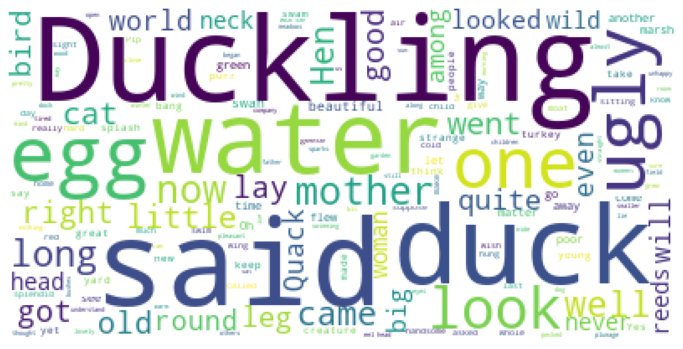

In [45]:
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(10)

plt.imshow(tail_wc, interpolation = "hermite")
plt.axis("off")
plt.show()

## The "said" appeared in the Word Cloud! - Remove it
* "said" is not really an informative word, so add it to the stopwords and re-generate the Word Cloud

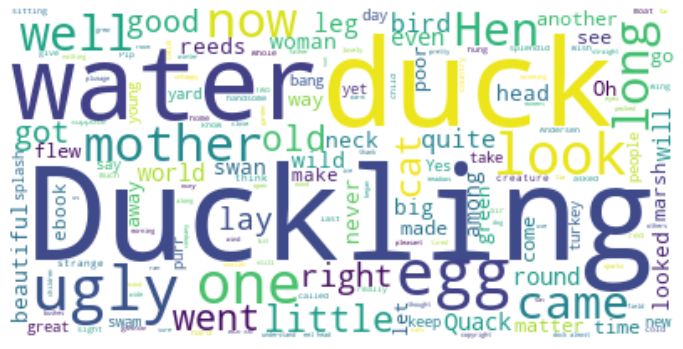

In [46]:
# Add the words said to stopwords
stopwords.add("said")

# Re-generate the word cloud
tail_wc.generate(result)

# Display the cloud
fig = plt.figure()
fig.set_figwidth(12)   # Set width
fig.set_figheight(12)  # Set height

plt.imshow(tail_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()   

## Downloading a cute duckling pic from web and save as a mask

In [47]:
!wget --quiet http://www.clker.com/cliparts/F/g/x/h/b/x/ugly-duckling-hi.png
    
duckling_mask = np.array(Image.open("ugly-duckling-hi.png"))

## Displaying the duckling pic

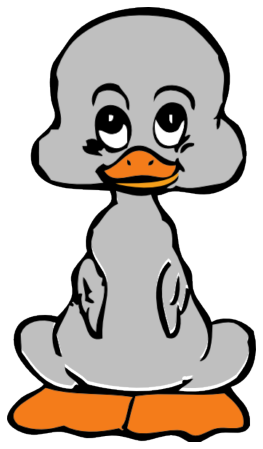

In [48]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

plt.imshow(duckling_mask, cmap = plt.cm.gray, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Generating the masked Word Cloud in duckling shape

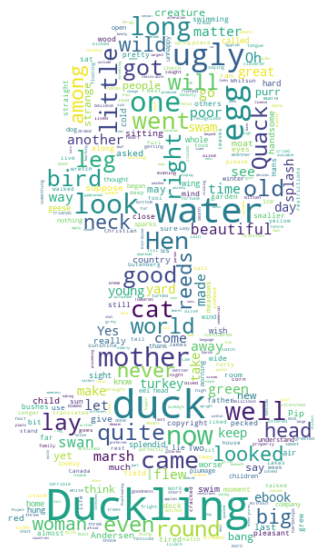

In [49]:
tail_wc = WordCloud(background_color = "white", max_words = 18906, mask = duckling_mask, stopwords = stopwords)

tail_wc.generate(result)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(tail_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Changing color for masked duckling

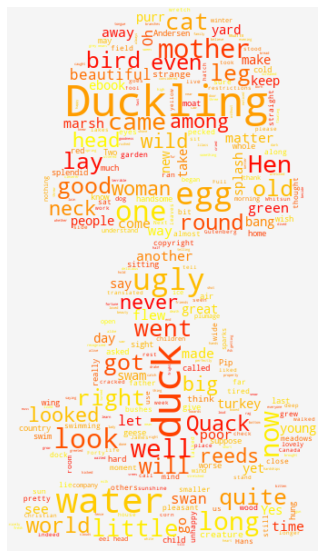

In [73]:
tail_wc = WordCloud(background_color = "whitesmoke", max_words = 18906, mask = duckling_mask, stopwords = stopwords, colormap = "autumn")

tail_wc.generate(result)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.imshow(tail_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()